#we have to predict
Predict CGPA of a student based on different grades in four years

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np


#importing libararies for data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#importing libraries for model selection,preprocessing,model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV


In [9]:
#Loading our dataset
df=pd.read_csv('/content/drive/MyDrive/Data science /Grades.csv')

In [10]:
df.head(8)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043


In [11]:
#describing our data set

In [12]:
df.shape

(571, 43)

In [13]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [14]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [15]:
df.dtypes

,0
Seat No.,object
PH-121,object
HS-101,object
CY-105,object
HS-105/12,object
MT-111,object
CS-105,object
CS-106,object
EL-102,object
EE-119,object


In [16]:
#checking for null values
df.isnull().sum()



,0
Seat No.,0
PH-121,0
HS-101,0
CY-105,1
HS-105/12,1
MT-111,2
CS-105,0
CS-106,2
EL-102,2
EE-119,2


In [17]:
#All columns except CGPA are object type
#There exist null values in some column


In [18]:
#first we have to convert string to integers

In [19]:
# Define a mapping for grades to numerical values
grade_mapping = {
    'A': 4.0, 'A-': 3.7, 'B+': 3.3, 'B': 3.0, 'B-': 2.7,
    'C+': 2.3, 'C': 2.0, 'C-': 1.7, 'D+': 1.3, 'D': 1.0,
    'D-': 0.7, 'F': 0.0
}

# Apply grade mapping to all grade columns except Seat No. and CGPA
for column in df.columns[1:-1]:
    df[column] = df[column].map(grade_mapping)



In [20]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,CS-97002,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,CS-97003,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,CS-97004,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,CS-97005,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,3.0,4.0,4.0,3.7,NaN,4.0,3.7,3.7,NaN,...,3.7,3.7,4.0,4.0,4.0,3.3,3.3,3.0,4.0,3.798
567,CS-97568,NaN,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,...,3.3,3.3,4.0,4.0,3.7,3.0,3.7,2.0,3.7,3.772
568,CS-97569,3.0,4.0,3.7,3.3,4.0,4.0,4.0,4.0,4.0,...,3.7,3.0,4.0,3.3,4.0,2.0,3.3,3.7,3.7,3.470
569,CS-97570,4.0,3.3,1.0,4.0,1.0,1.3,2.7,1.7,2.7,...,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193


In [21]:
#we have to change the  seat number also

In [22]:
le=LabelEncoder()
df['Seat No.']=le.fit_transform(df['Seat No.'])

In [23]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,3.0,4.0,4.0,3.7,NaN,4.0,3.7,3.7,NaN,...,3.7,3.7,4.0,4.0,4.0,3.3,3.3,3.0,4.0,3.798
567,567,NaN,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,...,3.3,3.3,4.0,4.0,3.7,3.0,3.7,2.0,3.7,3.772
568,568,3.0,4.0,3.7,3.3,4.0,4.0,4.0,4.0,4.0,...,3.7,3.0,4.0,3.3,4.0,2.0,3.3,3.7,3.7,3.470
569,569,4.0,3.3,1.0,4.0,1.0,1.3,2.7,1.7,2.7,...,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193


In [24]:
#next we have to fill the null values-using mean/median/mode

In [25]:
df.isna().sum()

,0
Seat No.,0
PH-121,24
HS-101,4
CY-105,35
HS-105/12,37
MT-111,28
CS-105,43
CS-106,8
EL-102,34
EE-119,9


In [26]:
df['PH-121']=df['PH-121'].fillna(df['PH-121'].mean())
df['HS-101']=df['HS-101'].fillna(df['HS-101'].mean())
df['CS-105']=df['CS-105'].fillna(df['CS-105'].mean())

In [27]:
df['CS-106']=df['CS-106'].fillna(df['CS-106'].mean())
df['EL-102']=df['EL-102'].fillna(df['EL-102'].mean())
df['EE-119']=df['EE-119'].fillna(df['EE-119'].mean())

In [28]:
df['ME-107']=df['ME-107'].fillna(df['ME-107'].mean())
df['CS-107']=df['CS-107'].fillna(df['CS-107'].mean())
df['HS-205/20']=df['HS-205/20'].fillna(df['HS-205/20'].mean())
df['MT-222']=df['MT-222'].fillna(df['MT-222'].mean())
df['MT-224']=df['MT-224'].fillna(df['MT-224'].mean())
df['EE-222']=df['EE-222'].fillna(df['EE-222'].mean())
df['CS-210']=df['CS-210'].fillna(df['CS-210'].mean())

In [29]:
df['CS-211']=df['CS-211'].fillna(df['CS-211'].mean())
df['CS-203']=df['CS-203'].fillna(df['CS-203'].mean())
df['CS-214']=df['CS-214'].fillna(df['CS-214'].mean())
df['CS-215']=df['CS-215'].fillna(df['CS-215'].mean())
df['EE-217']=df['EE-217'].fillna(df['EE-217'].mean())
df['CS-212']=df['CS-212'].fillna(df['CS-212'].mean())
df['MT-331']=df['MT-331'].fillna(df['MT-331'].mean())
df['EF-303']=df['EF-303'].fillna(df['EF-303'].mean())
df['HS-304']=df['HS-304'].fillna(df['HS-304'].mean())
df['CS-301']=df['CS-301'].fillna(df['CS-301'].mean())

In [30]:
df['CS-302']=df['CS-302'].fillna(df['CS-302'].mean())
df['TC-383']=df['TC-383'].fillna(df['TC-383'].mean())
df['MT-442']=df['MT-442'].fillna(df['MT-442'].mean())
df['EL-332']=df['EL-332'].fillna(df['EL-332'].mean())
df['CS-318']=df['CS-318'].fillna(df['CS-318'].mean())
df['CS-306']=df['CS-306'].fillna(df['CS-306'].mean())
df['CS-312']=df['CS-312'].fillna(df['CS-312'].mean())
df['CS-317']=df['CS-317'].fillna(df['CS-317'].mean())

In [31]:
df['CS-403']=df['CS-403'].fillna(df['CS-403'].mean())
df['CS-421']=df['CS-421'].fillna(df['CS-421'].mean())
df['CS-406']=df['CS-406'].fillna(df['CS-406'].mean())
df['CS-414']=df['CS-414'].fillna(df['CS-414'].mean())
df['CS-419']=df['CS-419'].fillna(df['CS-419'].mean())
df['CS-423']=df['CS-423'].fillna(df['CS-423'].mean())
df['CS-412']=df['CS-412'].fillna(df['CS-412'].mean())

In [32]:
df.isna().sum()

,0
Seat No.,0
PH-121,0
HS-101,0
CY-105,35
HS-105/12,37
MT-111,28
CS-105,0
CS-106,0
EL-102,0
EE-119,0


In [33]:
#so no  null values were detected.


In [34]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [35]:
#Exploratory Data Analysis


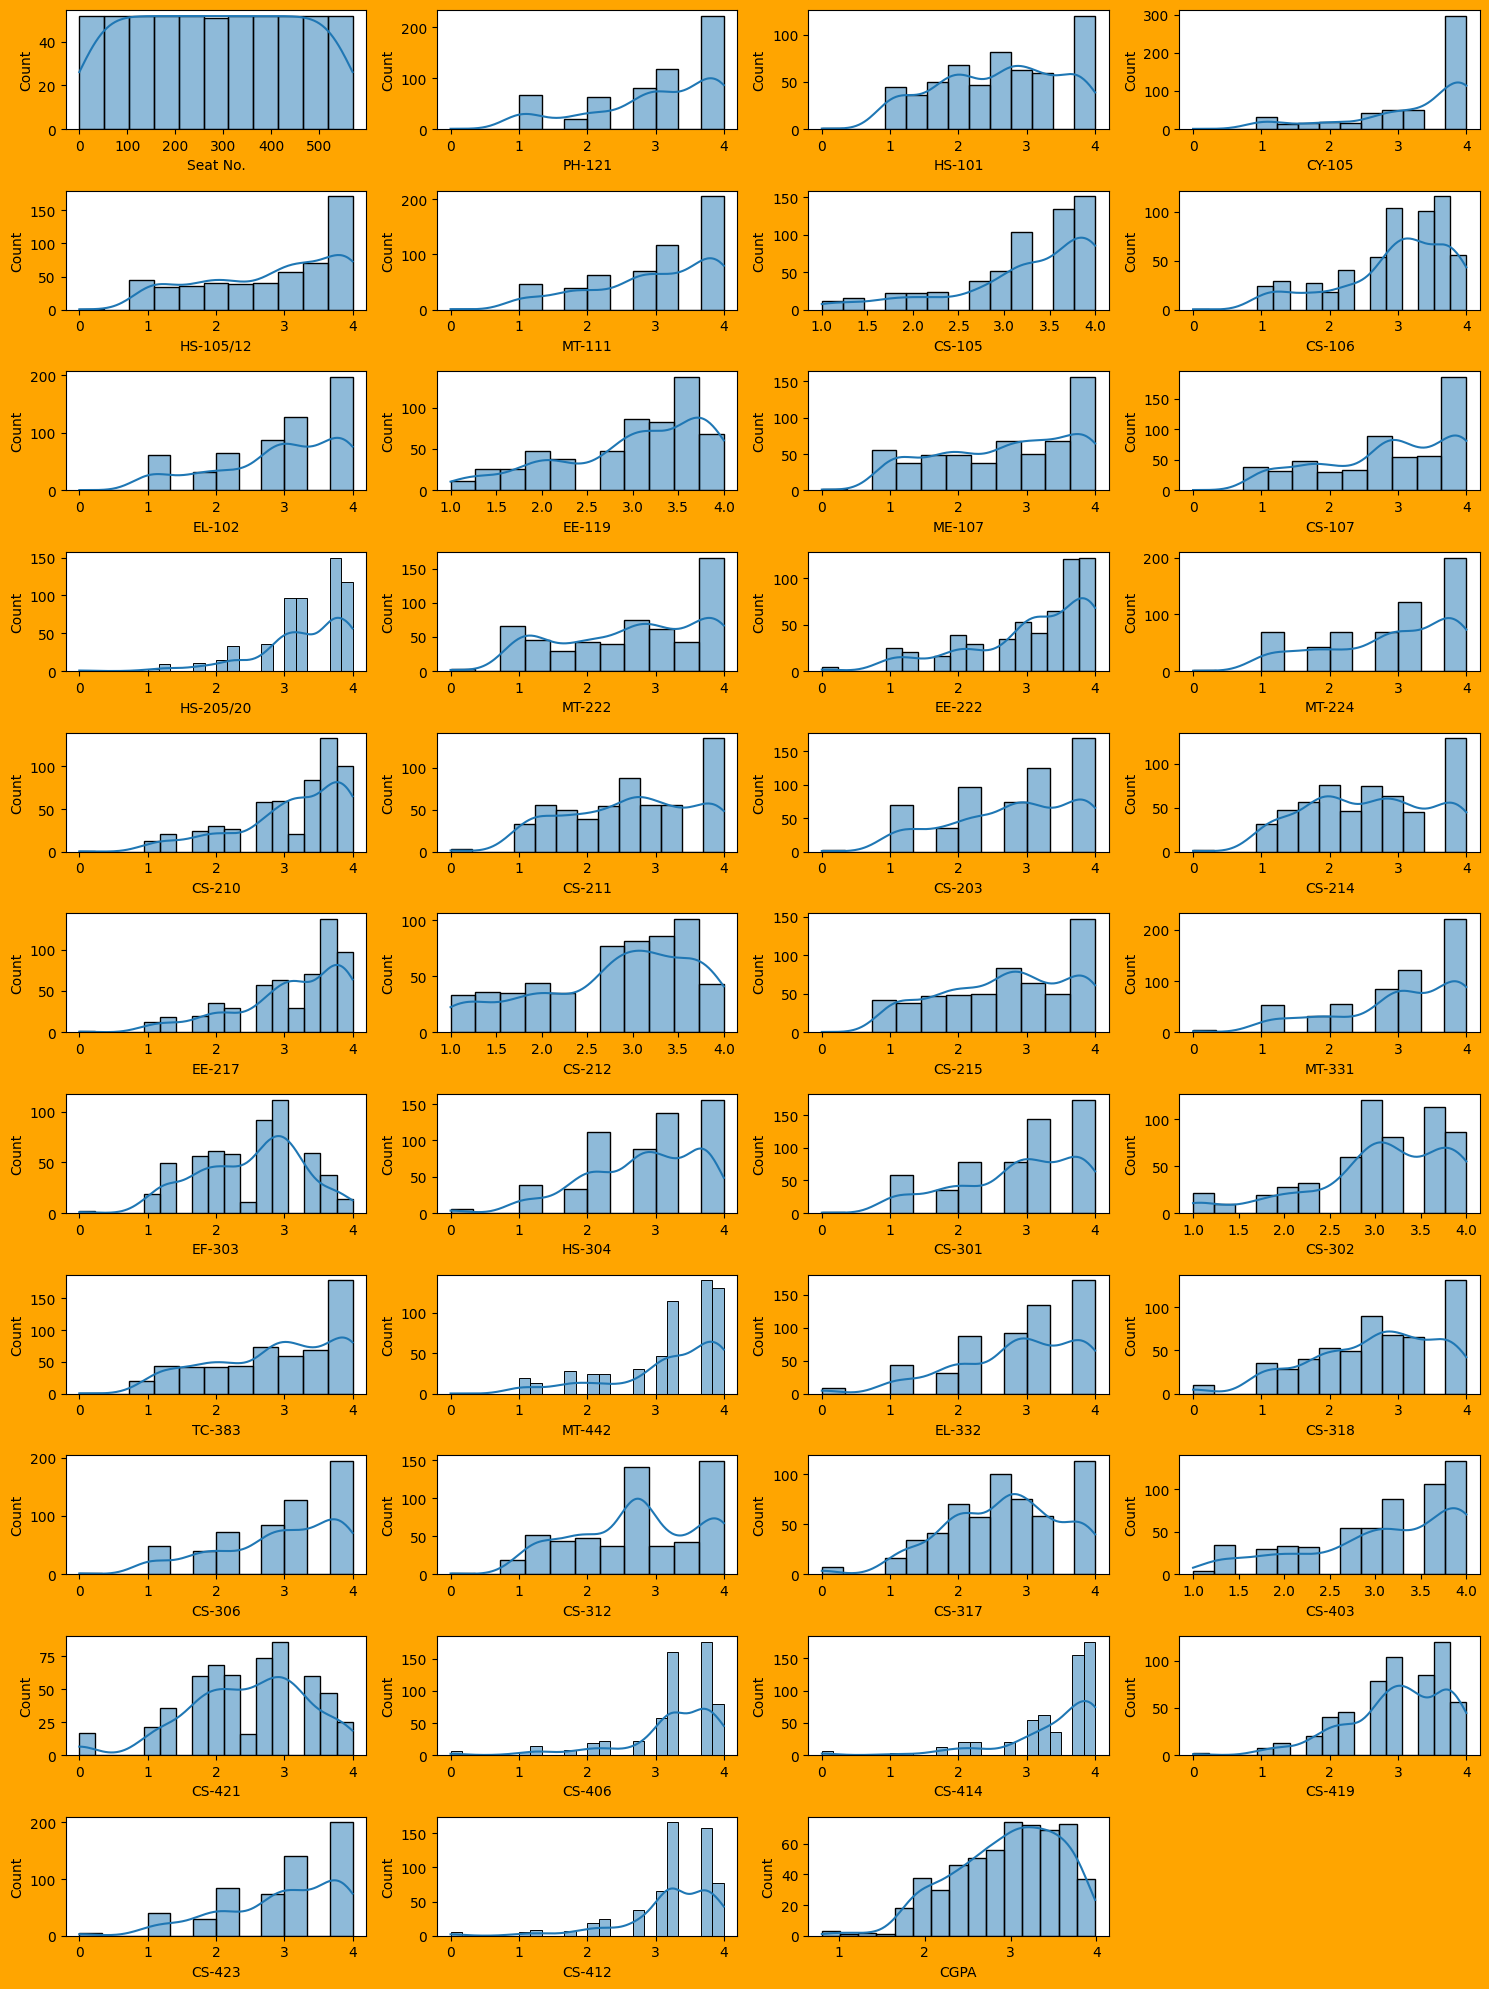

In [36]:
#Lets see how data is distributed for every column.
plt.figure(figsize=(15,20),facecolor='orange')
plotnumber=1
for column in df:
  if plotnumber<=43:
        ax=plt.subplot(11,4,plotnumber)
        sns.histplot(df[column], kde=True)
        plt.xlabel(column,fontsize=10)
  plotnumber+=1
plt.tight_layout()
plt.show()



In [37]:
#Then we go for checking outliers

In [38]:
df_feature=df.drop('CGPA',axis=1)

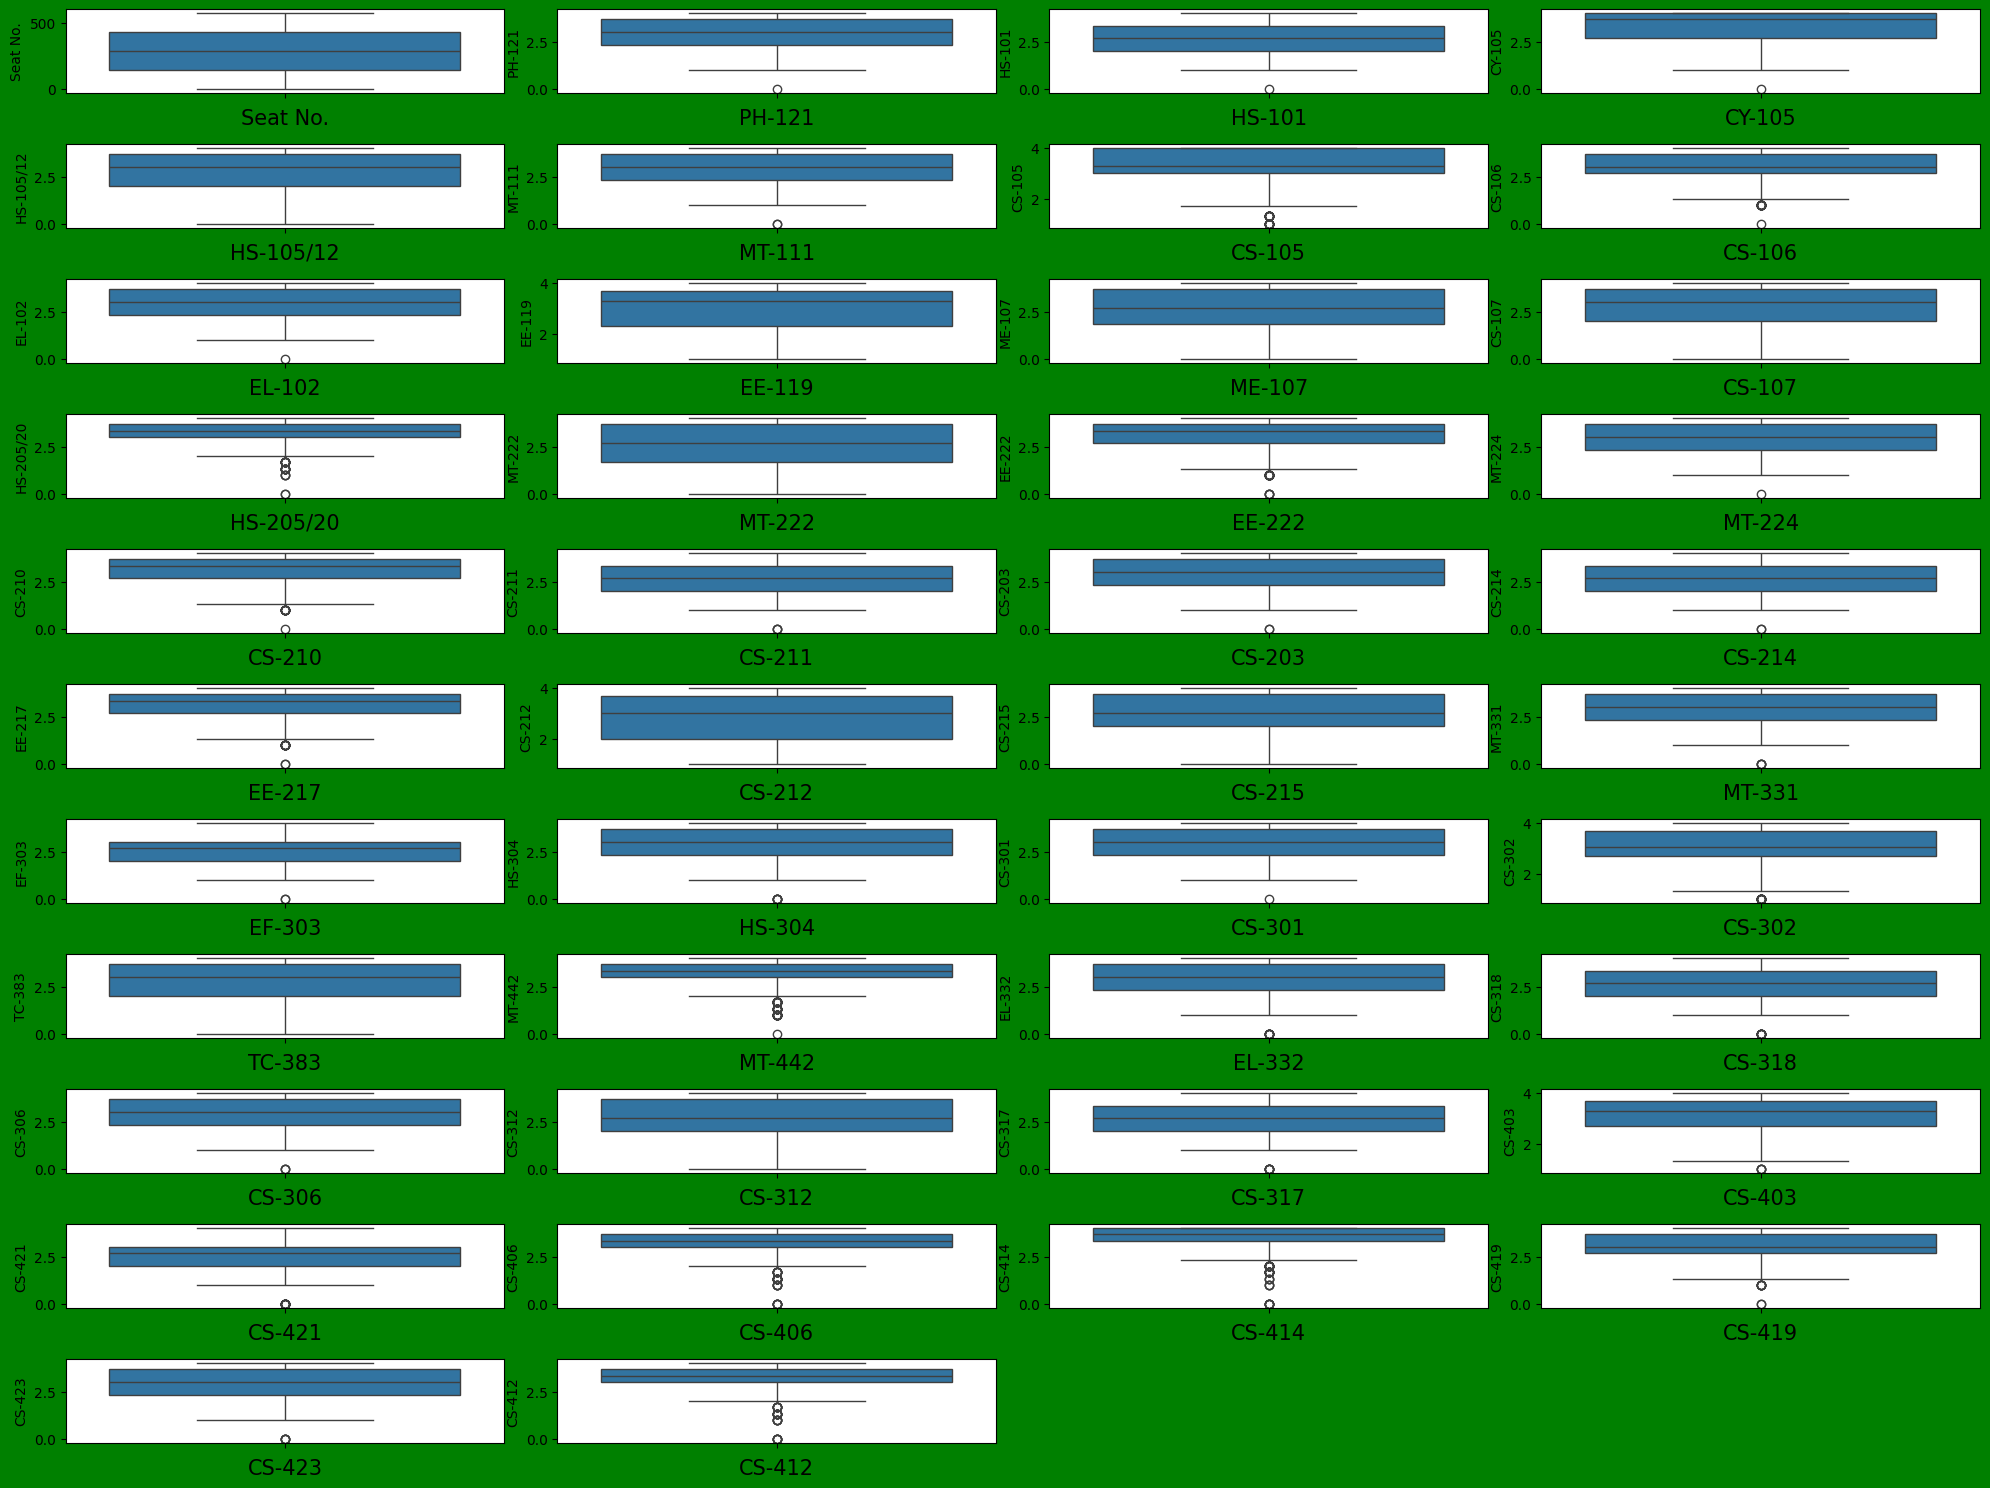

In [39]:
#Visualize the outliers using boxplot
plt.figure(figsize=(20,15),facecolor='green')
plotnumber=1
for column in df_feature:
    if plotnumber <=45:
        plt.subplot(11,4,plotnumber)
        ax=sns.boxplot(data=df_feature[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.tight_layout()

In [40]:
df.shape

(571, 43)

In [41]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [42]:
#we can visualize distribution of features VS label

In [43]:
x=df.drop(columns=['CGPA'])

y=df.CGPA

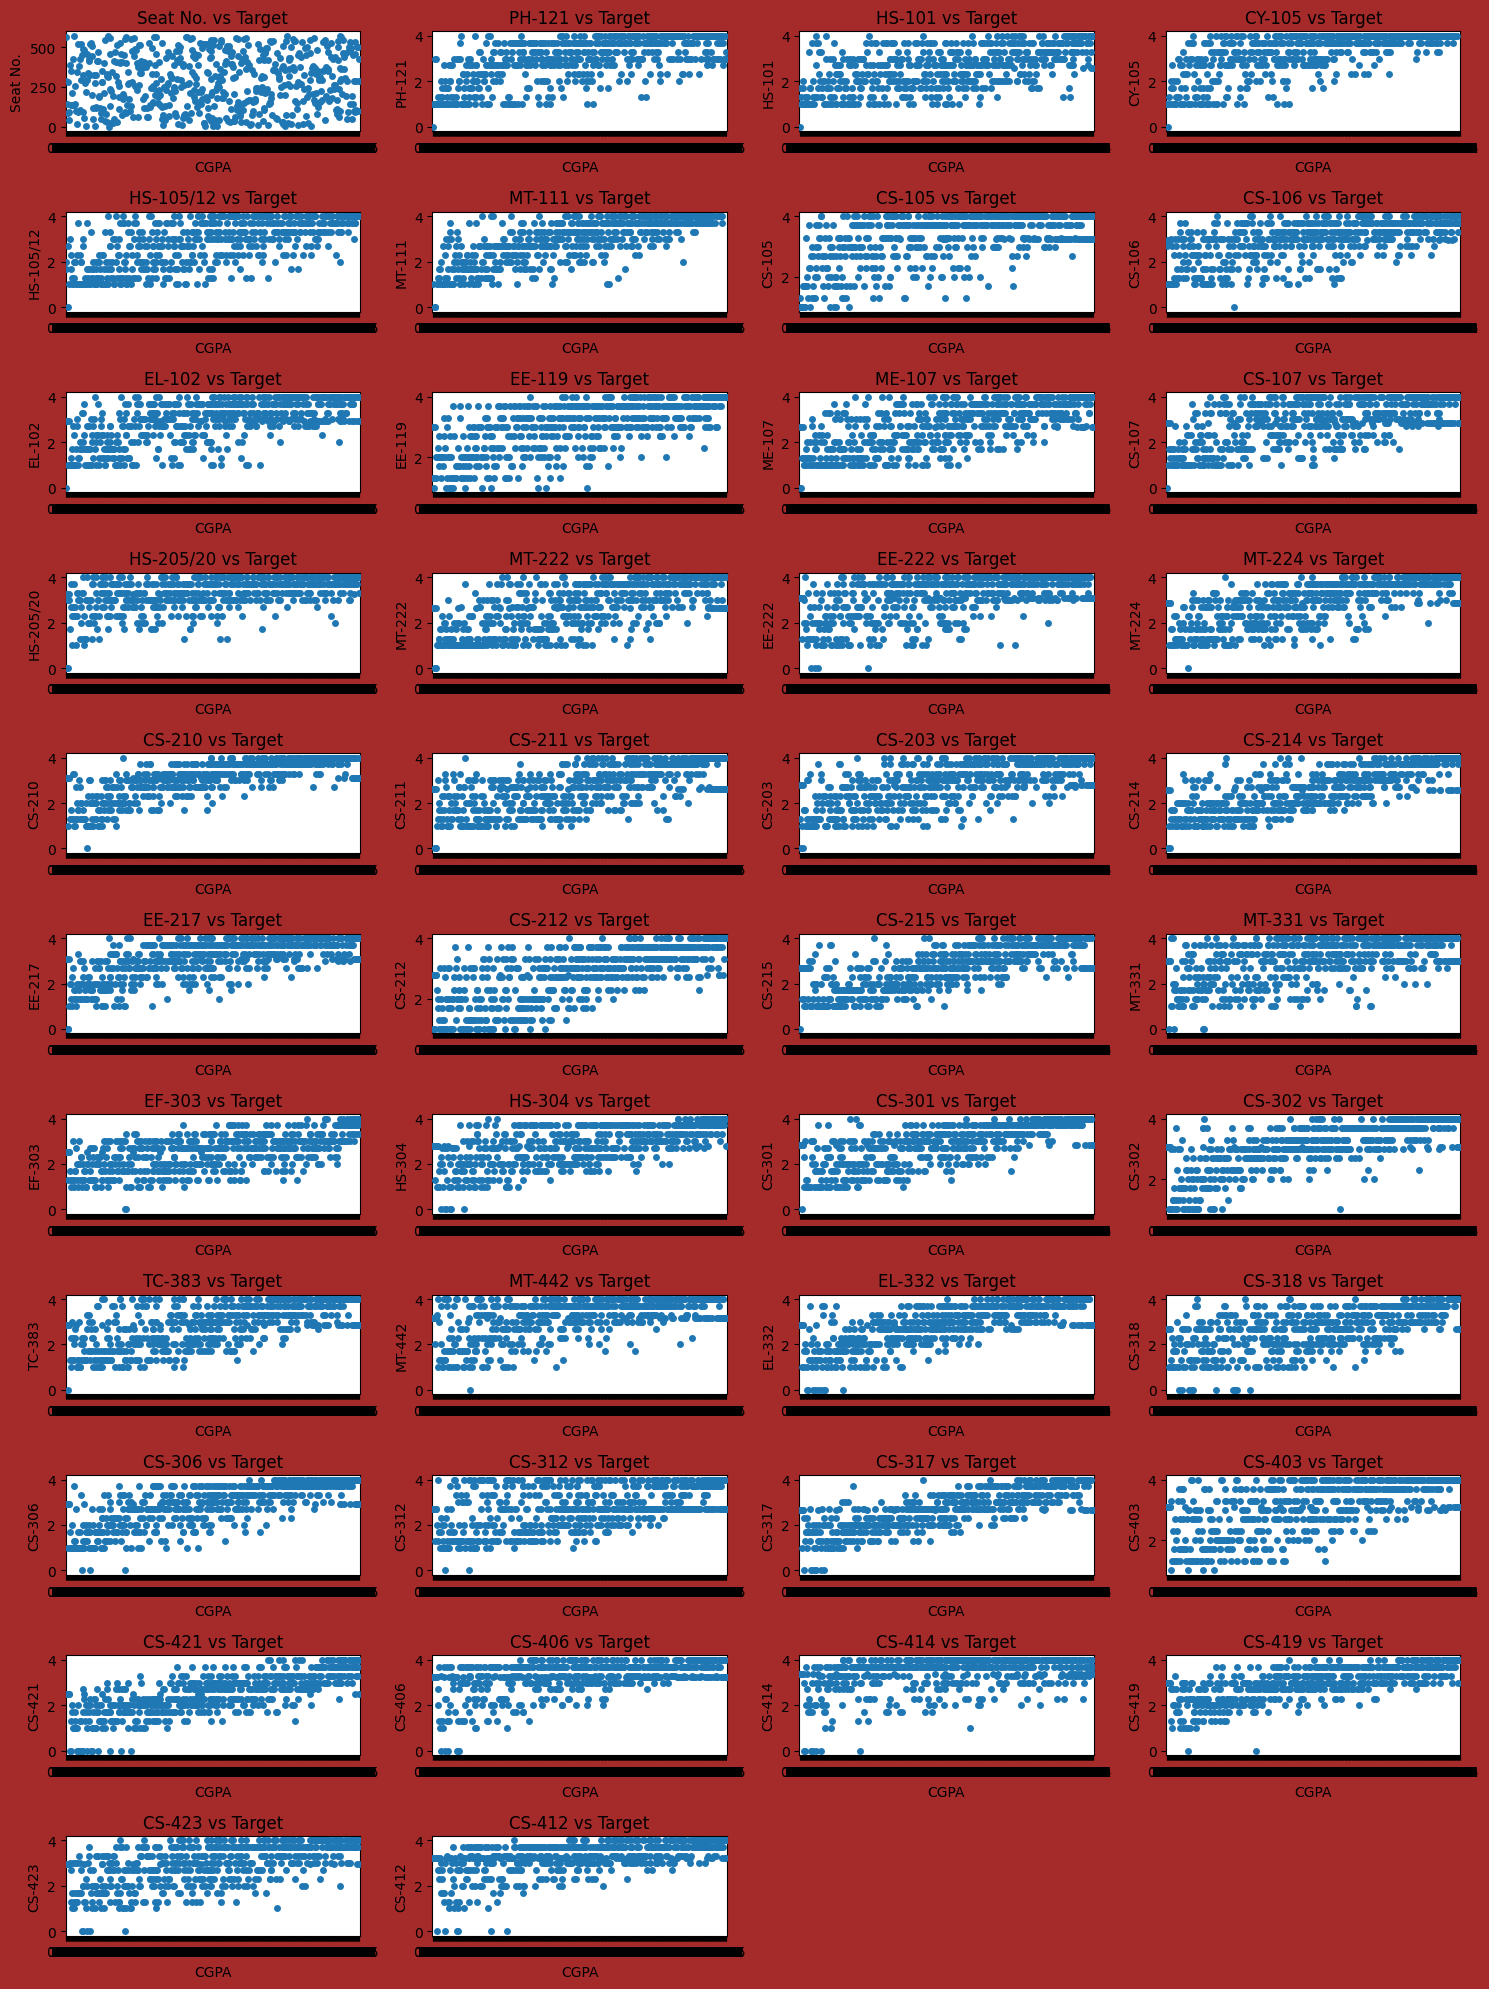

In [44]:
# Assuming 'x' is your features DataFrame and 'y' is your target class
plt.figure(figsize=(15,20),facecolor='brown')
plotnumber = 1
for column in x.columns:
    if plotnumber <= 45:
        ax = plt.subplot(11,4, plotnumber)
        sns.stripplot(x=y, y=x[column], ax=ax)
        ax.set_title(f'{column} vs Target')
    plotnumber += 1
plt.tight_layout()
plt.show()

In [45]:
#we go for checking the multicolinearity using vif


In [47]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [48]:
x_scaled.shape

(571, 42)

In [49]:
df.isna().sum()

,0
Seat No.,0
PH-121,0
HS-101,0
CY-105,35
HS-105/12,37
MT-111,28
CS-105,0
CS-106,0
EL-102,0
EE-119,0


In [50]:
x_scaled = np.nan_to_num(x_scaled, nan=np.nan, posinf=np.nan, neginf=np.nan)

# Impute NaN values using the mean
imputer = SimpleImputer(strategy='mean')
x_scaled = imputer.fit_transform(x_scaled)

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

In [51]:
vif

,vif
0,3.726886
1,2.812615
2,1.794893
3,2.532662
4,2.329042
5,2.512825
6,2.321157
7,2.114985
8,1.930309
9,2.430237


In [52]:
#All vif values are less than 5 .so  no multicolinearity exist

In [53]:
#train test split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=500)

In [55]:
model1=LinearRegression()

In [56]:
model1.fit(x_train,y_train)

LinearRegression()

In [57]:
y_pred1=model1.predict(x_test)

In [58]:
#Model1 Evaluation

In [59]:
mse1=mean_squared_error(y_test,y_pred1)
rmse1=np.sqrt(mse1)
model1_r2=r2_score(y_test,y_pred1)

In [60]:
print("================== Model1 Evaluation ==================")
print(f"MSE: {mse1}")
print(f"RMSE: {rmse1}")
print(f"R-squared: {model1_r2}")


================== Model1 Evaluation ==================
MSE: 0.025517238066218677
RMSE: 0.15974115958706034
R-squared: 0.9426892937296534


In [61]:
model1.score(x_train,y_train)

0.9397982054538957

In [62]:
model1.score(x_test,y_test)

0.9426892937296534

In [63]:
# there is a small difference in training score and testing score .so our model is not over fitted. no need to perform regularization.

In [64]:
model2=DecisionTreeRegressor()

In [65]:
model2.fit(x_train,y_train)

DecisionTreeRegressor()

In [66]:
y_pred2=model2.predict(x_test)

In [67]:
model2.score(x_test,y_test)

0.7937224229518502

In [68]:
model2.score(x_train,y_train)

1.0

In [69]:
model2.score(x_test,y_test)

0.7937224229518502

In [70]:
mse2=mean_squared_error(y_test,y_pred2)
rmse2=np.sqrt(mse2)
model2_r2=r2_score(y_test,y_pred2)

In [71]:
print("================== Model2 Evaluation ==================")
print(f"MSE: {mse2}")
print(f"RMSE: {rmse2}")
print(f"R-squared: {model2_r2}")

================== Model2 Evaluation ==================
MSE: 0.09184381739130439
RMSE: 0.30305744899491316
R-squared: 0.7937224229518502


In [72]:
model3=RandomForestRegressor()

In [73]:
model3.fit(x_train,y_train)

RandomForestRegressor()

In [74]:
y_pred3=model3.predict(x_test)

In [75]:
model3.score(x_test,y_test)

0.9560605991887727

In [76]:
model3.score(x_train,y_train)

0.9887864532546609

In [77]:
model3.score(x_test,y_test)

0.9560605991887727

In [78]:
mse3=mean_squared_error(y_test,y_pred3)
rmse3=np.sqrt(mse3)
model3_r2=r2_score(y_test,y_pred3)

In [79]:
print("================== Model3 Evaluation ==================")
print(f"MSE: {mse3}")
print(f"RMSE: {rmse3}")
print(f"R-squared: {model3_r2}")

================== Model3 Evaluation ==================
MSE: 0.019563746879999955
RMSE: 0.13987046464497055
R-squared: 0.9560605991887727


In [80]:
#performing cross validation

In [81]:
cross_val_score(model2,x,y,cv=5)

array([0.690928  , 0.79005768, 0.70291716, 0.7321903 , 0.7560366 ])

In [82]:
cross_val_score(model3,x,y,cv=5)

array([0.93965839, 0.93903926, 0.93523755, 0.93135923, 0.90418139])

In [83]:
# here the best model is model3-randomforest regressor

In [84]:
#so we can do hyperparameter tunning on that

In [85]:
params={'n_estimators':[13,15],
      'max_depth':[10,15],
       'min_samples_split':[10,13],
       'min_samples_leaf':[5,8]}

In [86]:
grd=GridSearchCV(model3,param_grid=params)
grd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 15], 'min_samples_leaf': [5, 8],
                         'min_samples_split': [10, 13],
                         'n_estimators': [13, 15]})

In [87]:
grd.best_params_

{'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 13,
 'n_estimators': 13}

In [88]:
model3=grd.best_estimator_

In [89]:
model3.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=13,
                      n_estimators=13)

In [90]:
y_pred33=model3.predict(x_test)

In [93]:
mse33=mean_squared_error(y_test,y_pred33)
rmse33=np.sqrt(mse33)
model33_r2=r2_score(y_test,y_pred33)

In [95]:
print("================== Model3-hypertuned Evaluation ==================")
print(f"MSE: {mse33}")
print(f"RMSE: {rmse33}")
print(f"R-squared: {model3_r2}")

================== Model3-hypertuned Evaluation ==================
MSE: 0.031760277261120885
RMSE: 0.17821413316883958
R-squared: 0.9286676749084937
